## Simple Linear Regression
Drug impact on Carona Viral Count


### Step 1: Reading and Understanding the Data
1. Import libraries:
2. Read data using the pandas library
3. Understand the structure of the data


In [13]:
# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')


In [14]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd


In [21]:
# Read the given CSV file, and view some sample records

drugData = pd.read_csv("SLR-Viral Drug data1.csv",)
drugData.head()

,Viralcount,Drug
0,2158.70,15.50
1,1678.15,23.75
2,2316.00,8.00
3,2061.30,17.00
4,2207.50,5.50


### Study the structure of the data

In [22]:
drugData.shape


(20, 2)

In [23]:
drugData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Viralcount  20 non-null     float64
 1   Drug        20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [24]:
drugData.describe()

,Viralcount,Drug
count,20.000000,20.000000
mean,2131.357500,13.362500
std,298.570066,7.631511
min,1678.150000,2.000000
25%,1783.475000,7.125000
50%,2182.850000,12.750000
75%,2342.037500,19.625000
max,2654.200000,25.000000


## Step 2: Visualising the Data
1. Plot Pairplot for correlation among X and Y variables (for MLR only)
2. Understand the relationship

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

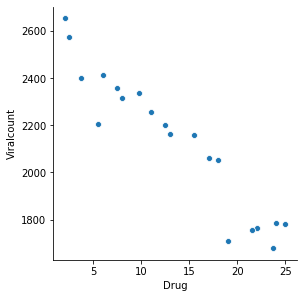

In [30]:
sns.pairplot(drugData, x_vars=['Drug'], y_vars='Viralcount',size=4, aspect=1, kind='scatter')
plt.show()

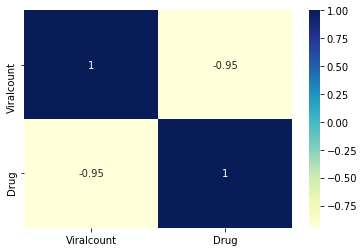

In [31]:
sns.heatmap(drugData.corr(), cmap="YlGnBu", annot =True)
plt.show()

#### As it is visible from the pairplot and the heatmap that the variable `Drug` seems to be most correlated with `Viralcount`. So let's go ahead and perform simple linear regression using `Drug` as our feature variable.

### Step 3: Performing Simple Linearn Regression


---
## Step 3: Performing Simple Linear Regression

Equation of multiple linear regression<br>
$y = β̥ + β̩ *x_1 + β₂* x_2 + ... + βn * x_n$

-  $y$ is the response variable
-  $β̥ $ is the intercept
-  $β̩ $ is the coefficient for the first feature
-  $β̩n$ is the coefficient for the nth feature<br>

In SLR:

$y = β̥  + β̩  \times Drug$

The $β̩$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `stasmodels`

We first assign the feature variable, `Drug`, in the case, to the variable `X` and the response variable, `Viralcount`, to the variable `y`.

In [34]:
X= drugData['Drug']
Y = drugData['Viralcount']


### Train-Test Split
You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset.


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
# let's now take a look at the train dataset

X_train.head()
X_train.shape

(14,)

In [38]:
Y_train.head()
Y_train.shape

(14,)

### Bulding a Linear Model

First import the `statsmodel.api` library using which you'll perform the linear regression.

In [41]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin.<Br> But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. <br> And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [42]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_train_sm

,const,Drug
16,1.0,6.00
1,1.0,23.75
9,1.0,11.00
14,1.0,22.00
12,1.0,25.00
5,1.0,19.00
2,1.0,8.00
4,1.0,5.50
10,1.0,13.00
0,1.0,15.50


In [43]:
# fit the regression line using 'OLS'
linearReg = sm.OLS(Y_train, X_train_sm).fit()

In [44]:
linearReg

In [46]:
# print the parameters, i.e. the intercept and the slop of the regression line fitted
linearReg.params

const    2606.714499
Drug      -36.109693
dtype: float64

In [47]:
# Performing a summary operation lists out all the diffrent parameters of the regression  line fitted
print(linearReg.summary())


                            OLS Regression Results                            
Dep. Variable:             Viralcount   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     81.41
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           1.07e-06
Time:                        17:44:37   Log-Likelihood:                -83.945
No. Observations:                  14   AIC:                             171.9
Df Residuals:                      12   BIC:                             173.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2606.7145     62.091     41.982      0.0

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for Drug is -36.1097, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.872
Meaning that 87.2% of the variance in `Viralcount` is explained by `Drug`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.